# Predicting Online Shopper Intent
#### SUPPORT VECTOR MACHINE IMPLEMENTATION
##### Implemented by Jeremia Adriano

In [1]:
import numpy as np
from IPython.display import display,HTML
import warnings
from matplotlib.colors import ListedColormap
from sklearn.svm import SVC
%matplotlib inline

from sklearn import svm, datasets

from  numpy import *
import matplotlib.pyplot as plt  
import pandas as pd 

np.set_printoptions(suppress=True)

from IPython.display import Markdown, display

def printmd(string):
    display(Markdown(string))


### Background

This project involves predicting something that is somewhat of a “holy grail” of business intelligence: trying to predict whether or not a customer will eventually make a purchase using while using an online shopping portal, based on the pattern of pages they have visited on the website, certain analytical features, the time of week and year, and other features. 

The data file we’ve been given is a selection of a much larger data set: it consists of 3816 data examples and 17 features; the output variable is the last (18th) column of the file labelled “Revenue” and represents whether or not a customer eventually made a purchase (0 – purchase made  / 1 – purchase not made).

### What is a Support Vector Machine (SVM)? 

A Support Vector Machine is a type of deep learning algorithm that performs supervised learning for classification or regression of data types.

![svm.png](img/svm.png)

In AI and ML, supervised learning systems provide both input and desired output data, which are labeled for classification. Classification provides a learning basis for future data processing. Support vector machines are used to sort two data groups by like classification. The algorithms draw lines (hyperplanes) to seperate the groups according to patterns. And in this implementation, the groups are "__purchase made__" or "__purchase not made__".

### Reading in the Data

We will begin with Importting our Training data whcih will be used to train our SVM, and perform predictions on the developed SVM using the Cross-Vaidation data set. 

In [2]:
#Load and print Training Data
data_train = loadtxt('data/train.dat')

column_labels = ['','# Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser Region', 'TrafficType', 'VisitorType', 'Weekend','Revenue']

print("\nTraining data: "+(str)(len(data_train)))
display(pd.DataFrame(data_train,columns = column_labels).head(10))

#Load and print Cross-validation Data
data_cv = loadtxt('data/cv.dat')
print("\nCV data: "+(str)(len(data_cv)))
display(pd.DataFrame(data_cv,columns = column_labels).head(10))


Training data: 2289


,,# Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,2.0,162.0,0.0,0.0,0.0,0.0,5.0,2.0,4.0,1.0,4.0,2.0,0.0,0.0
1,2.0,256.0,0.0,0.0,10.0,117.0,0.0,0.0,0.0,0.0,11.0,2.0,2.0,7.0,11.0,2.0,1.0,1.0
2,0.0,0.0,0.0,0.0,6.0,31.0,0.0,0.0,0.0,0.0,10.0,2.0,5.0,1.0,1.0,2.0,0.0,0.0
3,8.0,131.0,1.0,4.0,95.0,2107.0,0.0,0.0,0.0,0.0,5.0,2.0,2.0,4.0,4.0,2.0,1.0,0.0
4,2.0,8.0,1.0,14.0,14.0,603.0,0.0,0.0,44.0,0.0,3.0,2.0,2.0,1.0,7.0,2.0,0.0,1.0
5,1.0,18.0,0.0,0.0,62.0,1288.0,0.0,0.0,13.0,0.0,11.0,2.0,10.0,1.0,3.0,2.0,0.0,1.0
6,4.0,81.0,0.0,0.0,12.0,223.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,1.0,3.0,2.0,0.0,0.0
7,16.0,485.0,2.0,19.0,42.0,753.0,0.0,0.0,31.0,0.0,11.0,2.0,2.0,1.0,8.0,2.0,0.0,1.0
8,5.0,1417.0,0.0,0.0,36.0,1051.0,0.0,0.0,0.0,0.0,3.0,2.0,2.0,5.0,2.0,2.0,1.0,0.0
9,3.0,371.0,5.0,106.0,85.0,2128.0,0.0,0.0,43.0,0.0,11.0,1.0,1.0,1.0,2.0,2.0,0.0,1.0



CV data: 763


,,# Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser Region,TrafficType,VisitorType,Weekend,Revenue
0,1.0,112.0,0.0,0.0,8.0,543.0,0.0,0.0,28.0,0.0,10.0,1.0,1.0,6.0,2.0,0.0,1.0,1.0
1,2.0,28.0,0.0,0.0,12.0,224.0,0.0,0.0,44.0,0.0,3.0,3.0,2.0,6.0,2.0,2.0,0.0,1.0
2,2.0,14.0,0.0,0.0,53.0,2016.0,0.0,0.0,8.0,0.0,6.0,2.0,2.0,3.0,3.0,2.0,0.0,1.0
3,1.0,43.0,1.0,0.0,3.0,65.0,0.0,0.0,0.0,0.0,5.0,2.0,2.0,1.0,4.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.0,2.0,2.0,6.0,10.0,2.0,0.0,0.0
5,0.0,0.0,0.0,0.0,22.0,573.0,0.0,0.0,0.0,0.0,11.0,3.0,2.0,8.0,2.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,12.0,1.0,1.0,1.0,3.0,2.0,0.0,0.0
7,3.0,170.0,0.0,0.0,30.0,619.0,0.0,0.0,0.0,0.0,12.0,3.0,2.0,4.0,1.0,2.0,1.0,0.0
8,0.0,0.0,0.0,0.0,7.0,384.0,0.0,0.0,0.0,0.0,5.0,2.0,4.0,1.0,5.0,2.0,0.0,0.0
9,0.0,0.0,0.0,0.0,53.0,1121.0,0.0,0.0,24.0,0.0,7.0,2.0,4.0,9.0,1.0,2.0,0.0,1.0


### Reshape the Training data: 

In [3]:
#Set the shape of the features (m) and the shape of the classification (n)
#Notice that the final column is not a feature; it's the target variable/classification
m = data_train.shape[0]
n = data_train.shape[1]-1 


#Set X and y
#Note that the single-column matrix is reshaped to explicitly ensure that it is not a rank 1 array, where its shape is not (m,) but instead it is (m,1)
X = data_train[:,0:n]
y = data_train[:,n].reshape(m,1)

print("Features of the Training data:")
display(pd.DataFrame(X,columns = column_labels[:17]).head(10))

print("\nTarget variable of the Training data:")
display(pd.DataFrame(y).head(10))



Features of the Training data:


,,# Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser Region,TrafficType,VisitorType,Weekend
0,0.0,0.0,0.0,0.0,2.0,162.0,0.0,0.0,0.0,0.0,5.0,2.0,4.0,1.0,4.0,2.0,0.0
1,2.0,256.0,0.0,0.0,10.0,117.0,0.0,0.0,0.0,0.0,11.0,2.0,2.0,7.0,11.0,2.0,1.0
2,0.0,0.0,0.0,0.0,6.0,31.0,0.0,0.0,0.0,0.0,10.0,2.0,5.0,1.0,1.0,2.0,0.0
3,8.0,131.0,1.0,4.0,95.0,2107.0,0.0,0.0,0.0,0.0,5.0,2.0,2.0,4.0,4.0,2.0,1.0
4,2.0,8.0,1.0,14.0,14.0,603.0,0.0,0.0,44.0,0.0,3.0,2.0,2.0,1.0,7.0,2.0,0.0
5,1.0,18.0,0.0,0.0,62.0,1288.0,0.0,0.0,13.0,0.0,11.0,2.0,10.0,1.0,3.0,2.0,0.0
6,4.0,81.0,0.0,0.0,12.0,223.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,1.0,3.0,2.0,0.0
7,16.0,485.0,2.0,19.0,42.0,753.0,0.0,0.0,31.0,0.0,11.0,2.0,2.0,1.0,8.0,2.0,0.0
8,5.0,1417.0,0.0,0.0,36.0,1051.0,0.0,0.0,0.0,0.0,3.0,2.0,2.0,5.0,2.0,2.0,1.0
9,3.0,371.0,5.0,106.0,85.0,2128.0,0.0,0.0,43.0,0.0,11.0,1.0,1.0,1.0,2.0,2.0,0.0



Target variable of the Training data:


,0
0,0.0
1,1.0
2,0.0
3,0.0
4,1.0
5,1.0
6,0.0
7,1.0
8,0.0
9,1.0


### Reshape the cross-validation data: 

In [4]:
#Set the shape of the features (m) and the shape of the classification (n)
#Notice that the final column is not a feature; it's the target variable/classification
m2 = data_cv.shape[0]
n2 = data_cv.shape[1]-1 

#Set X and y
#Note that the single-column matrix is reshaped to explicitly ensure that it is not a rank 1 array, where its shape is not (m,) but instead it is (m,1)
X2 = data_cv[:,0:n]
y2 = data_cv[:,n].reshape(m2,1)



print("Features of Cross Validation data:")
display(pd.DataFrame(X,columns = column_labels[:17]).head(10))

print("\nTarget variable of the Cross Validation data:")
display(pd.DataFrame(y).head(10))



Features of Cross Validation data:


,,# Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser Region,TrafficType,VisitorType,Weekend
0,0.0,0.0,0.0,0.0,2.0,162.0,0.0,0.0,0.0,0.0,5.0,2.0,4.0,1.0,4.0,2.0,0.0
1,2.0,256.0,0.0,0.0,10.0,117.0,0.0,0.0,0.0,0.0,11.0,2.0,2.0,7.0,11.0,2.0,1.0
2,0.0,0.0,0.0,0.0,6.0,31.0,0.0,0.0,0.0,0.0,10.0,2.0,5.0,1.0,1.0,2.0,0.0
3,8.0,131.0,1.0,4.0,95.0,2107.0,0.0,0.0,0.0,0.0,5.0,2.0,2.0,4.0,4.0,2.0,1.0
4,2.0,8.0,1.0,14.0,14.0,603.0,0.0,0.0,44.0,0.0,3.0,2.0,2.0,1.0,7.0,2.0,0.0
5,1.0,18.0,0.0,0.0,62.0,1288.0,0.0,0.0,13.0,0.0,11.0,2.0,10.0,1.0,3.0,2.0,0.0
6,4.0,81.0,0.0,0.0,12.0,223.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,1.0,3.0,2.0,0.0
7,16.0,485.0,2.0,19.0,42.0,753.0,0.0,0.0,31.0,0.0,11.0,2.0,2.0,1.0,8.0,2.0,0.0
8,5.0,1417.0,0.0,0.0,36.0,1051.0,0.0,0.0,0.0,0.0,3.0,2.0,2.0,5.0,2.0,2.0,1.0
9,3.0,371.0,5.0,106.0,85.0,2128.0,0.0,0.0,43.0,0.0,11.0,1.0,1.0,1.0,2.0,2.0,0.0



Target variable of the Cross Validation data:


,0
0,0.0
1,1.0
2,0.0
3,0.0
4,1.0
5,1.0
6,0.0
7,1.0
8,0.0
9,1.0


### Visualizing the Data (If Possible)

Once the data has been reshaped, it is a good idea to try and visualise the data. Generally in Data Science, visualising the data is recommended (where possible) in order to give you a sense of the underlying structure of the data and/or the kind of functions that you may need to use as a decision boundary. However, **note** that for more than two features in a classification model, this is not possible, unless you plot them in pairs.


So, first start by filling in the function below which should index into ```X``` to filter out 0 and 1 examples based on their corresponding ```y``` labels and return them into the relevant array variables.

**NOTE:** You should _absolutely_ avoid looping through ```X``` using a loop of any sort. Rather, use numpy array boolean indexing to filter out ```X```.


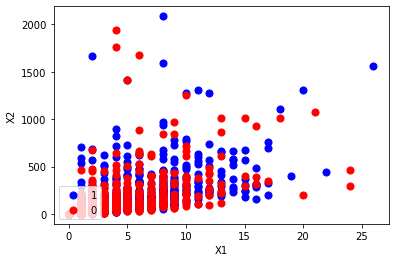

In [5]:
X_training= X
y_training= y.squeeze()

y_training = np.where(y_training, 1, 0)
plt.scatter(X_training[y_training ==1, 0],X_training[y_training ==1, 1],c='b',s=50)
plt.scatter(X_training[y_training ==0, 0],X_training[y_training== 0, 1],c='r',s=50)
plt.legend(["1", "0"],loc=3)
plt.xlabel('X1')
plt.ylabel('X2');

### Feature Scaling 


The datasets contain features that are highly varying in magnitudes, units and range. And since most Machine Learning algorithms use Eucledian Distance between two data points in their computations, this becomes a problem.

These algorithms only take in the magnitude of features neglecting the units. The results would vary greatly between different units, e.g 5kg and 5000gms. The features with higher magnitudes will weigh in a lot more in the distance calculations compared to features with low magnitudes.

To suppress this effect, we need to reduce all features to the same level of magnitudes. This can be achieved by __scaling__ and in this case, StandardScaler was used.

### How is the  StandardScaler achieved 


The standard score of a sample x is calculated as:

```z = (x - u) / s```

   > where ```u``` is the __mean__ of the training samples or zero if __with_mean=False__

   > ```s``` is the __standard deviation__ of the training samples or one if __with_std=False__.

In [6]:
from sklearn.preprocessing import StandardScaler

def getScaledX(X):
    X_scaled = np.zeros(X.shape)
    scaler = None
    
    #FILL IN BELOW:
    scaler = StandardScaler().fit(X)
    X_scaled = scaler.transform(X)
    #STOP FILLING IN HERE
    
    return X_scaled,scaler

#Scale Training data
X_scaled,scalerpt1 = getScaledX(X)

#Scale Cross Validation data
X_scaled2,scalerpt1 = getScaledX(X2)

In [7]:
X_mod = np.hstack([np.ones((m,1)),X_scaled]) #Add a column of 1s to X which will serve as the so-called x_0 feature: store the result in X_mod which we'll be using from now on
print("Scaled Training data:")
pd.DataFrame(X_mod).head(10)

Scaled Training data:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1.0,-0.769708,-0.521783,-0.458830,-0.288208,-0.683828,-0.605370,0.0,0.0,-0.505307,-0.11524,-0.938667,-0.093386,0.940154,-0.888107,-0.022217,0.450219,-0.577855
1,1.0,-0.217227,0.837473,-0.458830,-0.288208,-0.532650,-0.626345,0.0,0.0,-0.505307,-0.11524,0.878594,-0.093386,-0.206363,1.640347,1.697476,0.450219,1.730539
2,1.0,-0.769708,-0.521783,-0.458830,-0.288208,-0.608239,-0.666431,0.0,0.0,-0.505307,-0.11524,0.575717,-0.093386,1.513413,-0.888107,-0.759228,0.450219,-0.577855
3,1.0,1.440216,0.173774,0.287095,-0.259155,1.073622,0.301230,0.0,0.0,-0.505307,-0.11524,-0.938667,-0.093386,-0.206363,0.376120,-0.022217,0.450219,1.730539
4,1.0,-0.217227,-0.479306,0.287095,-0.186523,-0.457061,-0.399812,0.0,0.0,1.175591,-0.11524,-1.544420,-0.093386,-0.206363,-0.888107,0.714795,0.450219,-0.577855
5,1.0,-0.493468,-0.426210,-0.458830,-0.288208,0.450010,-0.080521,0.0,0.0,-0.008679,-0.11524,0.878594,-0.093386,4.379707,-0.888107,-0.267887,0.450219,-0.577855
6,1.0,0.335254,-0.091706,-0.458830,-0.288208,-0.494855,-0.576936,0.0,0.0,-0.505307,-0.11524,-1.544420,-1.230404,-0.779622,-0.888107,-0.267887,0.450219,-0.577855
7,1.0,3.650140,2.053369,1.033020,-0.150207,0.072064,-0.329894,0.0,0.0,0.678962,-0.11524,0.878594,-0.093386,-0.206363,-0.888107,0.960465,0.450219,-0.577855
8,1.0,0.611494,7.001909,-0.458830,-0.288208,-0.041320,-0.190991,0.0,0.0,-0.505307,-0.11524,-1.544420,-0.093386,-0.206363,0.797529,-0.513557,0.450219,1.730539
9,1.0,0.059013,1.448076,3.270795,0.481690,0.884648,0.311018,0.0,0.0,1.137388,-0.11524,0.878594,-1.230404,-0.779622,-0.888107,-0.513557,0.450219,-0.577855


In [8]:
X_mod1 = np.hstack([np.ones((m2,1)),X_scaled2]) #Add a column of 1s to X which will serve as the so-called x_0 feature: store the result in X_mod which we'll be using from now on
print("\nScaled Cross validation data")
pd.DataFrame(X_mod1).head(10)


Scaled Cross validation data


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1.0,-0.455978,0.081781,-0.446930,-0.282114,-0.648794,-0.504753,0.0,0.0,0.398043,-0.081218,0.583405,-1.220072,-0.767789,1.154816,-0.509613,-2.095797,1.695021
1,1.0,-0.162134,-0.317360,-0.446930,-0.282114,-0.563382,-0.670557,0.0,0.0,0.906127,-0.081218,-1.529114,0.927367,-0.235223,1.154816,-0.509613,0.483385,-0.589963
2,1.0,-0.162134,-0.383884,-0.446930,-0.282114,0.312097,0.260857,0.0,0.0,-0.237061,-0.081218,-0.623749,-0.146352,-0.235223,-0.068968,-0.259398,0.483385,-0.589963
3,1.0,-0.455978,-0.246085,0.253291,-0.282114,-0.755560,-0.753199,0.0,0.0,-0.491103,-0.081218,-0.925537,-0.146352,-0.235223,-0.884824,-0.009182,0.483385,-0.589963
4,1.0,-0.749823,-0.450407,-0.446930,-0.282114,-0.798266,-0.786983,0.0,0.0,-0.491103,-0.081218,0.885194,-0.146352,-0.235223,1.154816,1.492111,0.483385,-0.589963
5,1.0,-0.749823,-0.450407,-0.446930,-0.282114,-0.349850,-0.489160,0.0,0.0,-0.491103,-0.081218,0.885194,0.927367,-0.235223,1.970672,-0.509613,-2.095797,-0.589963
6,1.0,-0.749823,-0.450407,-0.446930,-0.282114,-0.755560,-0.786983,0.0,0.0,-0.491103,-0.081218,1.186982,-1.220072,-0.767789,-0.884824,-0.259398,0.483385,-0.589963
7,1.0,0.131710,0.357379,-0.446930,-0.282114,-0.179025,-0.465251,0.0,0.0,-0.491103,-0.081218,1.186982,0.927367,-0.235223,0.338960,-0.759829,0.483385,1.695021
8,1.0,-0.749823,-0.450407,-0.446930,-0.282114,-0.670147,-0.587395,0.0,0.0,-0.491103,-0.081218,-0.925537,-0.146352,0.829910,-0.884824,0.241033,0.483385,-0.589963
9,1.0,-0.749823,-0.450407,-0.446930,-0.282114,0.312097,-0.204330,0.0,0.0,0.271022,-0.081218,-0.321960,-0.146352,0.829910,2.378600,-0.759829,0.483385,-0.589963


### Hypertuning the Parameters of the SVM:

#### Regularization Cost parameter and gamma paramter

The SVM model will be trained using __8__ different ```cost functions``` and along with __8__ different ```gammas``` in order to obtain the best combination to be able to achieve the highest Cross Validation accuracy. All the gammas and cost functions were given in the project discriptions. Each accuracy obtained will be appended to a list then the best accuracy along with its gamma and cost parameter will be selected as the final SVM model.

In [9]:
from sklearn.metrics import accuracy_score

cost_range = [0.125, 0.5, 2, 8, 32, 128, 512, 2048]
prediction = 0;
gamma_range = [4.8828125*10**-4, 1.953125*10**-3, 7.8125*10**-3, 0.03125,0.125, 0.5, 2, 8]
classifiers = []
acur = []
for cost in cost_range:
    for gamma in gamma_range:
        clf = SVC(C=cost, gamma=gamma)
        clf.fit(X_scaled, y.squeeze())
        classifiers.append((cost, gamma, clf))
        prediction=clf.predict(X_scaled2)
        acur.append(accuracy_score(y2, prediction))

### Visualize the accuracies of the trained SVM models:

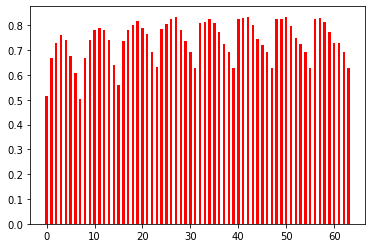


The training accuracies of the SVMs are as follows:



[0.5137614678899083, 0.6697247706422018, 0.72870249017038, 0.7601572739187418, 0.7404980340760158, 0.6762778505897772, 0.6094364351245085, 0.5019659239842726, 0.6671035386631717, 0.7391874180865007, 0.7798165137614679, 0.7889908256880734, 0.7798165137614679, 0.7391874180865007, 0.6422018348623854, 0.5609436435124509, 0.7378768020969856, 0.7798165137614679, 0.8007863695937091, 0.817824377457405, 0.7889908256880734, 0.7640891218872871, 0.690694626474443, 0.6304062909567497, 0.7863695937090432, 0.8047182175622543, 0.8243774574049804, 0.8322411533420708, 0.781127129750983, 0.7352555701179554, 0.6920052424639581, 0.6290956749672346, 0.8086500655307994, 0.8138925294888598, 0.8243774574049804, 0.8112712975098296, 0.7732634338138925, 0.7247706422018348, 0.6920052424639581, 0.6290956749672346, 0.8256880733944955, 0.8296199213630406, 0.8348623853211009, 0.8007863695937091, 0.7431192660550459, 0.7221494102228048, 0.6920052424639581, 0.629095

In [10]:
names = []
for i in range(0,len(acur)):
    names.append(i)
    
plt.bar(names,acur, color ='r', width = 0.5)
plt.show()

print("\nThe training accuracies of the SVMs are as follows:\n\n\n")
print(acur)

### Select the most promising SVM:

In [11]:
#Find the Highest Training Accuracy
maxAcc = np.amax(acur)
print("The SVM classifier with the highest Training Accuracy scored", maxAcc)

#Find the classifier with the Highest Training Accuracy
index = np.where(acur == np.amax(acur))
index = (index[0])[0]
print("\n\nThe parameters of the chosen SVM classifier are as follows:\n", classifiers[index])

The SVM classifier with the highest Training Accuracy scored 0.8348623853211009


The parameters of the chosen SVM classifier are as follows:
 (128, 0.0078125, SVC(C=128, gamma=0.0078125))


### Initialize and test the final model with the desired Cost parameter and Gamma

In [12]:
#SVM is initialized using the chosen parameters
SVM= (classifiers[index])[2]
SVM.fit(X_scaled, y.squeeze())
yre1=SVM.predict(X_scaled2)

### Obtaining the Confusion Matrix and visualizing it

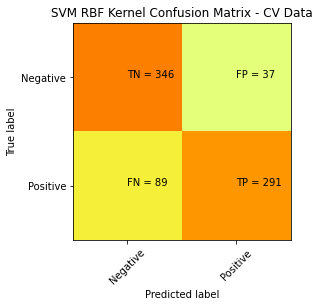

In [13]:
import sklearn.metrics as sklm
from sklearn.metrics import confusion_matrix

sklm.confusion_matrix(y_true=y2,y_pred=yre1)

from sklearn.metrics import accuracy_score


predicted = SVM.predict(X_scaled2)

#print("The acuurancy score is ",accuracy_score(y, predicted)*100)

cm = confusion_matrix(y2, predicted)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('SVM RBF Kernel Confusion Matrix - CV Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]

for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()


### Visualising The results

In [14]:
import sklearn.metrics as sklm


def getMetricsSKL(ytrue,ypred):
    acc = 0
    rec = 0
    prec = 0
    f1 = 0
    
    #FILL IN HERE: Set all of the variables above correctly
    acc = sklm.accuracy_score(ytrue, ypred)
    rec = sklm.recall_score(ytrue, ypred)
    prec = sklm.precision_score(ytrue, ypred)
    f1 = sklm.f1_score(ytrue, ypred)
    #STOP FILLING IN HERE
    
    return acc,rec,prec,f1


accskl,recskl,precskl,f1skl = getMetricsSKL(y2,yre1)
SVMresult = [accskl*100,recskl*100,precskl*100,f1skl*100]

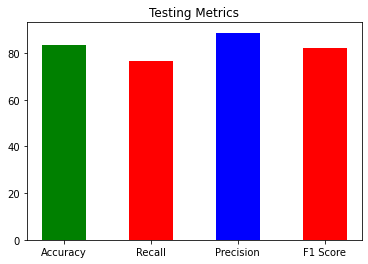


From the graph above we can see that:

 	 	Support Vector Machine has an Accuracy of 83.0%

 	 	Support Vector Machine has an recall of 77.0%

 	 	Support Vector Machine has an Precision  of 89.0%

 	 	Support Vector Machine has an f1-score of 82.0%


In [15]:
titles = "Accuracy","Recall", "Precision", "F1 Score"
temp = [SVMresult[0],SVMresult[1],SVMresult[2],SVMresult[3]]

plt.title("Testing Metrics")
plt.bar(titles[0], temp[0], color ='g', width = 0.5)
plt.bar(titles[1], temp[1], color ='r', width = 0.5)
plt.bar(titles[2], temp[2], color ='b', width = 0.5)
plt.bar(titles[3], temp[3], color ='r', width = 0.5)

plt.show()

print("\nFrom the graph above we can see that:")
print("\n \t \tSupport Vector Machine has an Accuracy of " + str(round(temp[0])) +"%")
print("\n \t \tSupport Vector Machine has an recall of " + str(round(temp[1])) +"%")
print("\n \t \tSupport Vector Machine has an Precision  of " + str(round(temp[2])) +"%")
print("\n \t \tSupport Vector Machine has an f1-score of " + str(round(temp[3])) +"%")



### Save the model:

In [16]:
import pickle

# Save to file in the current working directory
pkl_filename = "model/svm_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(SVM, file)


### Biblography:


- "The Evolution and Core Concepts of Deep Learning & Neural Networks", _Analytics Vidhya_, 7 Oct.2016,[Accesssed online 10 May 2019]
https://www.analyticsvidhya.com/blog/2016/08/evolution-core-concepts-deep-learning-neural-networks/



- Albon, Chris. "Tuning Neural Network Hyperparameters", _Chris Albon_ ,20 Dec. 2017, [Accesssed online 12 May 2019]
https://www.chrisalbon.com/deep_learning/keras/tuning_neural_network_hyperparamerters/


- Various SKLearn modules were obtained from https://scikit-learn.org

# iShopper_intention

### About Project:
This project involves predicting something that is somewhat of a “holy grail” of business intelligence: trying to predict whether or not a customer will eventually make a purchase using while using an online shopping portal, based on the pattern of pages they have visited on the website, certain analytical features, the time of week and year, and other features.

### Data: 
The data file provided with this project is a selection of a much larger data set: it consists of 3816 data examples and 17 features; the output variable is the last (18th) column of the file labelled “Revenue” and represents whether or not a customer eventually made a purchase (0 – purchase made / 1 – purchase not made).

These features are based off the information on this webpage:  https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset

### Deliverables:

A.	Split the dataset into Training, Cross-validation and Testing datasets.

B.	Train and test 3 classifiers, each using one of the following techniques:
      •	Neural Network
      •	Support Vector Machine
      •	Logistic Regression
      
### Implementation:

This project has been implemented using Jupyter Notebooks equiped with various python libraries which include:
      •	Numpy
      •	Pandas
      •	SKLearn
      •	Pickle